In [2]:
# packages
using Plots
using StatsBase
using Statistics
using LinearAlgebra
using LowRankApprox
using Formatting
using Colors 
using ImageFiltering
using Images
using ImageMagick
using TestImages
using ImageView
using ImageTransformations
using DataFrames
using CSV
using Dates
using FreqTables

# <font color="blue">1. What is data?</font>

## <font color="deepskyblue">One-dimensional data (numeric vectors)</font>

$$
\begin{bmatrix}
x_1 \\ \vdots \\ x_n
\end{bmatrix}, 
\quad
[y_1,\dotsc,y_n]
$$

In [7]:
# an example of one dimensional data
print("Daily maximum temperature (C) of July, August and September")
x=rand(20:35, 91)

Daily maximum temperature (C) of July, August and September

91-element Vector{Int64}:
 29
 23
 26
 25
 31
 20
 32
 31
 35
 35
 20
 31
 23
  ⋮
 23
 30
 25
 32
 31
 34
 35
 21
 22
 25
 29
 34

In [8]:
d0=Date(2022,7,1);
dates=string(d0);
for k=1:90
    dates=[dates;string(d0+Day(k))]
end
DataFrame(Date=dates, MaxTemp=x)

91×2 DataFrame
 Row │ Date        MaxTemp 
     │ String      Int64   
─────┼─────────────────────
   1 │ 2022-07-01       29
   2 │ 2022-07-02       23
   3 │ 2022-07-03       26
   4 │ 2022-07-04       25
   5 │ 2022-07-05       31
   6 │ 2022-07-06       20
   7 │ 2022-07-07       32
   8 │ 2022-07-08       31
   9 │ 2022-07-09       35
  10 │ 2022-07-10       35
  11 │ 2022-07-11       20
  ⋮  │     ⋮          ⋮
  82 │ 2022-09-20       25
  83 │ 2022-09-21       32
  84 │ 2022-09-22       31
  85 │ 2022-09-23       34
  86 │ 2022-09-24       35
  87 │ 2022-09-25       21
  88 │ 2022-09-26       22
  89 │ 2022-09-27       25
  90 │ 2022-09-28       29
  91 │ 2022-09-29       34
            70 rows omitted

## <font color=deepskyblue>Two-dimensional data (matirces)</font>

$$
A
=
[x_{ij}]_{m \times n}
=
\begin{bmatrix}
x_{11} & \dotsb & x_{1n}
\\
\vdots & & \vdots
\\
x_{m1} & \dotsb & x_{mn}
\end{bmatrix}
$$

In [4]:
# an example of two dimensional data 1
print("Grading of Calculus and Linear Algebra for 10 students")
A1=rand(50:100, 10,3)

Grading of Calculus and Linear Algebra for 10 students

10×3 Matrix{Int64}:
 96  90  53
 92  70  51
 70  50  83
 63  65  64
 74  69  66
 65  96  89
 78  91  60
 83  53  77
 76  90  62
 53  62  89

In [5]:
id=string.(101)
for k=2:10
    id=[id;string(100+k)];
end
DataFrame(ID=id, 
          Calculus=A1[:,1],
          LinearAlgebra=A1[:,2],
          Computer=A1[:,3])

10×4 DataFrame
 Row │ ID      Calculus  LinearAlgebra  Computer 
     │ String  Int64     Int64          Int64    
─────┼───────────────────────────────────────────
   1 │ 101           96             90        53
   2 │ 102           92             70        51
   3 │ 103           70             50        83
   4 │ 104           63             65        64
   5 │ 105           74             69        66
   6 │ 106           65             96        89
   7 │ 107           78             91        60
   8 │ 108           83             53        77
   9 │ 109           76             90        62
  10 │ 110           53             62        89

Grayscale Image

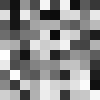

In [6]:
# an example of two dimensional data 2
print("Grayscale Image")
A2=rand(10,10)
Gray.(A2)

## <font color=deepskyblue>Three-dimensional data (more than two matrices)</font>

$$
A
=
[a_{ij}]_{m \times n}, 
\quad
B
=
[b_{ij}]_{m \times n}, 
\quad
C
=
[c_{ij}]_{m \times n}, 
\quad
\dotsc
$$

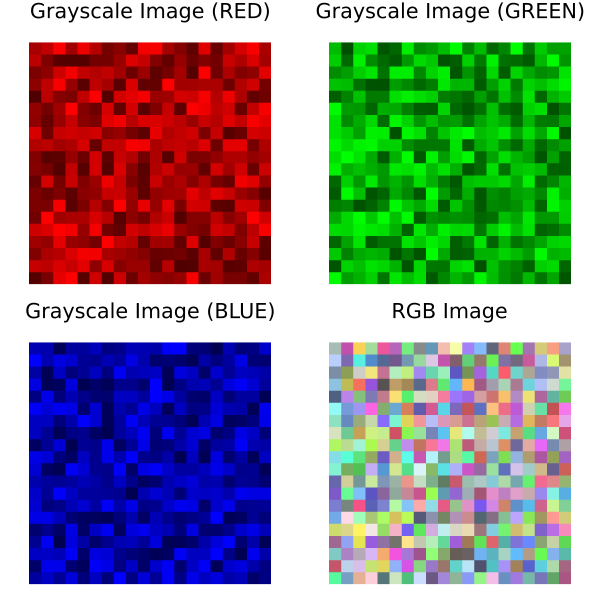

In [2]:
# an example of three-dimensional data
R=rand(80:255, 20, 20);
G=rand(80:255, 20, 20);
B=rand(80:255, 20, 20);
X=zeros(3,20,20);
X[1,:,:]=R/255;
X[2,:,:]=G/255;
X[3,:,:]=B/255;
P=colorview(RGB,X);

p1=plot(RGB.(R/255,0,0), 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="Grayscale Image (RED)")

p2=plot(RGB.(0,G/255,0), 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="Grayscale Image (GREEN)")

p3=plot(RGB.(0,0,B/255), 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="Grayscale Image (BLUE)")

p4=plot(P, 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="RGB Image")

p5=plot(p1, p2, p3, p4, 
     layout=(2,2), 
     size=(600,600), 
     margin=Plots.Measures.Length(:mm, 2.0))
savefig("rgb_matrix.png") 

p5

┌ Info: Saved animation to 
│   fn = C:\Users\hiroy\Dropbox\Julia\jupyter\grayscale_animation.gif
└ @ Plots C:\Users\hiroy\.julia\packages\Plots\rDbWY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\hiroy\\Dropbox\\Julia\\jupyter\\grayscale_animation.gif")
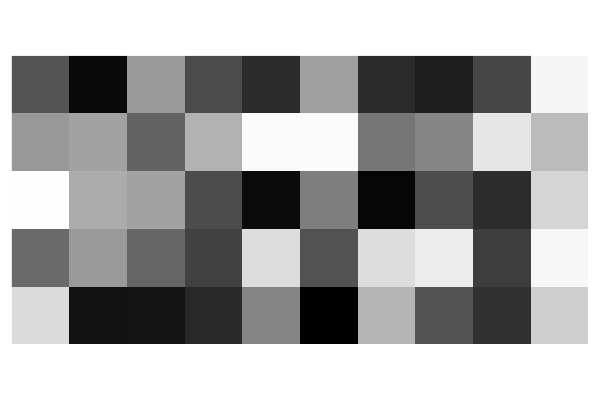

In [8]:
# an example of three-dimensional data
Z=rand(5,10,60);
anim1 = @animate for k=1:60
    plot(Gray.(Z[:,:,k]),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false)
end
gif(anim1, "grayscale_animation.gif", fps = 3)	

## <font color=deepskyblue>Four-dimensional data</font>

┌ Info: Saved animation to 
│   fn = C:\Users\hiroy\Dropbox\Julia\jupyter\rgb_animation.gif
└ @ Plots C:\Users\hiroy\.julia\packages\Plots\rDbWY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\hiroy\\Dropbox\\Julia\\jupyter\\rgb_animation.gif")
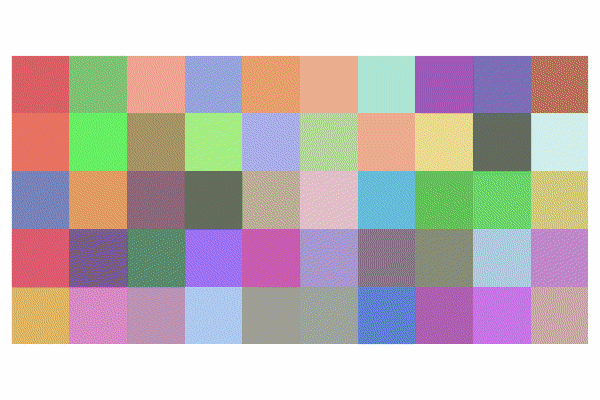

In [9]:
# an example of four-dimensional data
R=rand(80:255, 5, 10, 60);
G=rand(80:255, 5, 10, 60);
B=rand(80:255, 5, 10, 60);
V=zeros(3,5,10,60);
V[1,:,:,:]=R/255;
V[2,:,:,:]=G/255;
V[3,:,:,:]=B/255;
anim2 = @animate for k=1:60
    plot(colorview(RGB,V[:,:,:,k]),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false)
end
gif(anim2, "rgb_animation.gif", fps = 3)	

# <font color="blue">2. One-dimensional data</font>

Using the data $x$, we study the information contained in $x$ and its visualization. 

## <font color="deepskyblue">Line graph</font>

$x^T=[x_1,\dotsc,x_n]$ is a discrete time series data and we can visualize it by a line graph. 

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423


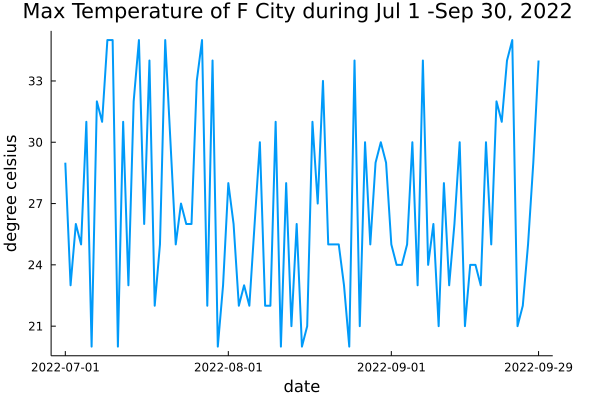

In [9]:
d1=d0+Day(31);
d2=d0+Day(62);
d3=d0+Day(90);
l0=string(d0);
l1=string(d1);
l2=string(d2);
l3=string(d3);    
plot(x,
    grid=false,
    linewidth=2, 
    title="Max Temperature of F City during Jul 1 -Sep 30, 2022 ", 
    right_margin=Plots.Measures.Length(:mm, 10.0),
    xticks = ([1 32 63 91;], [l0 l1 l2 l3]),
    xlabel="date",
    yaxis="degree celsius",
    legend=false)

## <font color="deepskyblue">Frequency table and histogram</font>

We see the frequency of data. Let $n=20,\dotsc,35$ be class values. Classify the data $x$ according to class intervals $[n-1/2,n+1/2)$.A histogram os a bar-graph of frequency of classes. 

In [10]:
# class values
class=20;
for k=21:35
    class=[class;k];
end

#frequencies
y=zeros(16);
z=zeros(16);
for k=1:16
    for l=1:91
        if x[l]==k+19
            y[k]=y[k]+1
        end
    z[k]=sum(y[1:k]);
    end
end
y=Int64.(y);
z=Int64.(z);
ry=100*y/91;
rz=100*z/91;

DataFrame(ClassValue=class, 
          Freq=y,
          AccumulativeFreq=z,
          RelativeFreq=ry,
          AccumulativeRelativeFreq=rz)

16×5 DataFrame
 Row │ ClassValue  Freq   AccumulativeFreq  RelativeFreq  AccumulativeRelative ⋯
     │ Int64       Int64  Int64             Float64       Float64              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │         20      6                 6       6.59341                   6.5 ⋯
   2 │         21      6                12       6.59341                  13.1
   3 │         22      7                19       7.69231                  20.8
   4 │         23      8                27       8.79121                  29.6
   5 │         24      5                32       5.49451                  35.1 ⋯
   6 │         25     11                43      12.0879                   47.2
   7 │         26      9                52       9.89011                  57.1
   8 │         27      2                54       2.1978                   59.3
   9 │         28      3                57       3.2967                   62.6 ⋯
  10 │         29      4                61       4.3956                   67.0
  11 │         30      7                68       7.69231                  74.7
  12 │         31      6                74       6.59341                  81.3
  13 │         32      3                77       3.2967                   84.6 ⋯
  14 │         33      2                79       2.1978                   86.8
  15 │         34      6                85       6.59341                  93.4
  16 │         35      6                91       6.59341                 100.0
                                                                1 column omitted

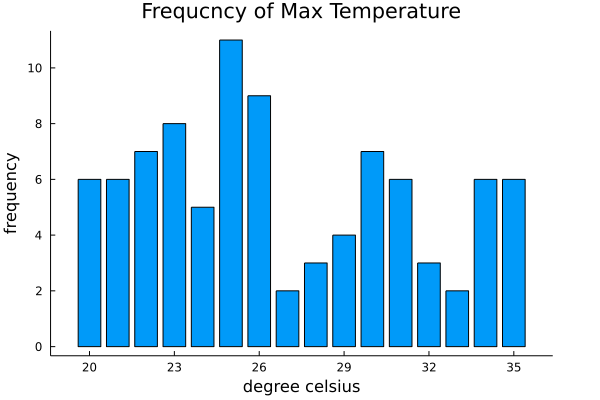

In [11]:
p6=bar(y,
    grid=false,
    title="Frequcncy of Max Temperature", 
    right_margin=Plots.Measures.Length(:mm, 10.0),
    xticks = ([1 4 7 10 13 16;], [20 23 26 29 32 35]),
    xlabel="degree celsius",
    yaxis="frequency",
    yticks = ([0 2 4 6 8 10;], [0 2 4 6 8 10]),
    legend=false)
savefig("histogram.png") 
p6

## <font color="deepskyblue">Mean, Median and Mode</font>

The mean of $x=[x_1,\dotsc,x_n]^T$ is defined by 

$$
\bar{x}
=
\frac{1}{n}
\sum_{k=1}^n
x_k.
$$

The median of $x=[x_1,\dotsc,x_n]^T$ is defined by 

\begin{align*}
  \operatorname{Me}(x)
& =
  X\left(\left[\frac{n}{2}\right]\right) 
  \quad
  (\text{even $n$}),
\\
  \operatorname{Me}(x)
& =
  \cfrac{X\left(\left[\cfrac{n-1}{2}\right]\right)+X\left(\left[\cfrac{n+1}{2}\right]\right)}{2}
  \quad
  (\text{odd $n$}),
\end{align*}

where $X$ is the rearrangement of $x$ in ascending or descending order. A data
The mode $\operatorname{Mo}(x)$ of 𝑥=[𝑥1,…,𝑥𝑛]𝑇 is the most frequent value of $x_1,\dotsc,x_n$, which is not necessarily one value.

In [12]:
print("Computation of the mean, meadian and mode")
# mean
m=sum(x)/length(x);
# median
me=median(x);
# mode
mo=mode(x);
DataFrame(Mean=m, 
          Median=me,
          Mode=mo)

Computation of the mean, meadian and mode

1×3 DataFrame
 Row │ Mean     Median   Mode  
     │ Float64  Float64  Int64 
─────┼─────────────────────────
   1 │ 26.8022     26.0     25

Consider an exapme of data 

$$
y=[1,2,3,4,5,6,7,8,1000]^T.
$$

Then 

$$
\bar{y}=115.11111111111111, 
\quad
\operatorname{Me}(y)=5. 
$$

The average $\bar{y}$ does not represent the properties of $y$ but 
the median $\operatorname{Me}(y)=5$ shows something about $y$. 

## <font color="deepskyblue">Variance and Standard Deviation</font>

Compare the following two data:

$$
u=[10,20,30,40,50,60,70,80,90],
\quad
v=[30,35,40,45,50,55,60,65,70].
$$

Then 

$$
\bar{u}=\bar{v}=\operatorname{Me}(u)=\operatorname{Me}(v)=50. 
$$

But their degrees of scatter are different. 
The variance of $x$

$$
\sigma_x^2
:=
\frac{1}{n-1}
\sum_{j=1}^n(x_j-\bar{x})^2
$$

or the standard deviation $\sigma_x$ describe the degree of scatter of $x$.

In [18]:
# variance
sigma2=sum((x.-m).^2)/(length(x)-1)

21.227106227106223

In [19]:
#standard deviation
std(x)

4.607288381152869

In [33]:
u=[10 20 30 40 50 60 70 80 90]';
v=[30 35 40 45 50 55 60 65 70]';
mu=sum(u)/length(u);
mv=sum(v)/length(v);
sigma_u2=sum((u.-mu).^2)/(length(u)-1);
sigma_v2=sum((v.-mu).^2)/(length(v)-1);
DataFrame(sigma_u2=sigma_u2, 
          sigma_v2=sigma_v2)

1×2 DataFrame
 Row │ sigma_u2  sigma_v2 
     │ Float64   Float64  
─────┼────────────────────
   1 │    750.0     187.5